Reduce the numbers of dataa inside the .chi2 files

In [57]:
import os
import numpy as np
import argparse

def import_chi2_files(directory):
    chi2_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.chi2'):
                chi2_files.append(os.path.join(root, file))
    print(chi2_files)
    data = {}
    headers = {}
    for file in chi2_files:
        file_path = os.path.join(directory, file)
        with open(file_path, 'r') as f:
            first_line = f.readline().strip()
            if '# PROCESSED' not in first_line:
                headers[file] = first_line
                try:
                    data[file_path] = np.loadtxt(file_path, skiprows=1)
                except ValueError as e:
                    print(f"Skipping file {file_path} due to error: {e}")
    return data, headers

def reduce_chi2_files(directory, target_memory):
    data, headers = import_chi2_files(directory)
    for file_path, content in data.items():
        current_memory = content.nbytes
        if current_memory > target_memory:
            reduction_factor = int(np.ceil(current_memory / target_memory))
            reduced_content = content[::reduction_factor]
            with open(file_path, 'w') as f:
                f.write(headers[file_path] + ' # PROCESSED\n')
                np.savetxt(f, reduced_content)

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Reduce .chi2 files to fit a target memory size.")
    parser.add_argument("directory", type=str, help="Directory containing .chi2 files")
    parser.add_argument("target_memory", type=int, help="Target memory size in bytes (50000 works fine)")

    args = parser.parse_args()
    reduce_chi2_files(args.directory, args.target_memory)

usage: ipykernel_launcher.py [-h] directory target_memory
ipykernel_launcher.py: error: the following arguments are required: directory, target_memory


SystemExit: 2

/home/simo/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [56]:
reduce_chi2_files('/home/simo/Scrivania/Thesis/RMC/RMCProfile/Simulations/Prova/',50000)

['/home/simo/Scrivania/Thesis/RMC/RMCProfile/Simulations/Prova/SiO2/crystal-nodata-data/start/sio2.chi2', '/home/simo/Scrivania/Thesis/RMC/RMCProfile/Simulations/Prova/SiO2/crystal-nodata-data/crystal/sio2.chi2', '/home/simo/Scrivania/Thesis/RMC/RMCProfile/Simulations/Prova/SiO2/crystal-nodata-data/10min/sio2.chi2', '/home/simo/Scrivania/Thesis/RMC/RMCProfile/Simulations/Prova/SiO2/start/sio2.chi2', '/home/simo/Scrivania/Thesis/RMC/RMCProfile/Simulations/Prova/SiO2/final/sio2.chi2', '/home/simo/Scrivania/Thesis/RMC/RMCProfile/Simulations/Prova/SiO2/8h_run/sio2.chi2', '/home/simo/Scrivania/Thesis/RMC/RMCProfile/Simulations/Prova/350K/rebin/start/geo2_350K.chi2', '/home/simo/Scrivania/Thesis/RMC/RMCProfile/Simulations/Prova/350K/rebin/final/geo2_350K.chi2', '/home/simo/Scrivania/Thesis/RMC/RMCProfile/Simulations/Prova/350K/pbc_rulez/ge_o_network/30_min/ge_o_network.chi2', '/home/simo/Scrivania/Thesis/RMC/RMCProfile/Simulations/Prova/350K/pbc_rulez/ge_o_network/start/ge_o_network.chi2', '

3.132645977786338


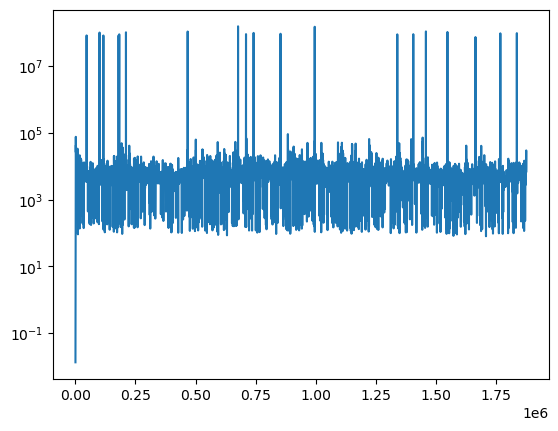

In [51]:
filepath = '/home/simo/Scrivania/Thesis/RMC/RMCProfile/Simulations/Prova/350K/sio2_cfg/8_hrs/'

data = np.loadtxt(filepath+'geo2_350K.chi2', skiprows = 1 ).transpose()


acc_moves = data[0] 
chi2 = data[3]
#print(len(chi2))

#plt.plot(acc_moves, chi2)

#print(chi2[::326])

#data = np.loadtxt(filepath+'8h_run/geo2_350K.chi2', skiprows = 1 ).transpose()
print(1561411/data.nbytes)
acc_moves = data[0] 
chi2 = data[3]
#print(len(chi2))
#print(chi2)

plt.plot(acc_moves, chi2)
plt.yscale('log')
plt.show()


